In [1]:
# import libraries
import pandas as pd
import numpy as np
import xgboost as xgb
import math
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from tqdm.notebook import tqdm
from collections import Counter
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from functools import reduce
from sklearn.model_selection import GridSearchCV
from statistics import mean, stdev
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from random import sample
from matplotlib import pyplot as plt

In [2]:
# load the dataset
all_merged = pd.read_csv('C:/Users/s3929438/all_features_desktop_100.csv')

# Practise stage - Trying out the codes one by one

In [ ]:
all_merged

In [ ]:
randomstate = np.random.RandomState(seed=10)
user_train_set = all_merged[all_merged['User']==1].sample(frac=0.8, random_state=randomstate)
sample_ids = all_merged[all_merged['User']==1].sample(frac=0.8, random_state=randomstate)['sample']
user_test_set = all_merged[(all_merged['User']==1) & ~all_merged['sample'].isin (sample_ids)]

In [ ]:
all_train_set  = pd.DataFrame()
all_test_set = pd.DataFrame()
user_id = 1
for i in range (1,117):
    if i != user_id:
        train_set = all_merged[all_merged['User']==i].sample(frac=0.8, random_state=randomstate)
        sample_ids = all_merged[all_merged['User']==i].sample(frac=0.8, random_state=randomstate)['sample']
        test_set = all_merged[(all_merged['User']==i) & ~all_merged['sample'].isin (sample_ids) ]
    
        all_train_set = all_train_set.append(train_set,ignore_index=True)
        all_test_set = all_test_set.append(test_set, ignore_index=True)

In [ ]:
user_train_set['User_type']==1
all_train_set['User_type']=0
user_test_set['User_type']=1
all_test_set['User_type']=1

In [ ]:
# randomstate = np.random.RandomState(seed=10)
# user_test_set_m = all_merged_mobile[all_merged_mobile['User']==1].sample(frac=0.8, random_state=randomstate)

In [ ]:
# all_test_set_m  = pd.DataFrame()
# user_id = 1
# for i in range (1,117):
#     if i != user_id:
#         test_set_m = all_merged_mobile[all_merged_mobile['User']==i].sample(frac=0.8, random_state=randomstate)
#         all_test_set_m = all_test_set_m.append(test_set_m,ignore_index=True)
        

In [ ]:
# user_test_set_m['User_type']=0
# all_test_set_m['User_type']=1

In [ ]:
selected_test_set = all_test_set.sample(n=len(user_test_set),random_state=randomstate)

In [ ]:
final_test_set

In [ ]:
final_train_set = user_train_set.append(all_train_set)
final_test_set = user_test_set.append(selected_test_set)

In [3]:
selected_features = ['Error_rate_%', 'neg_UD_%', 'mean_hold_time', 'mean_F1_dis_1_LL',
       'mean_F1_dis_1_RR', 'mean_F1_dis_2_LL', 'mean_F1_dis_2_RR',
       'mean_F1_dis_3_LL', 'mean_F1_dis_3_RR', 'mean_F2_dis_1_LL',
       'mean_F2_dis_1_RR', 'mean_F2_dis_2_LL', 'mean_F2_dis_2_RR',
       'mean_F2_dis_3_LL', 'mean_F2_dis_3_RR', 'mean_F3_dis_1_LL',
       'mean_F3_dis_2_LL', 'mean_F3_dis_2_RR', 'mean_F3_dis_3_LL',
       'mean_F3_dis_3_RR', 'mean_F4_dis_1_LL', 'mean_F4_dis_1_RR',
       'mean_F4_dis_2_LL', 'mean_F4_dis_2_RR', 'mean_F4_dis_3_LL',
       'mean_F4_dis_3_RR', 'Tri_graph', 'mean_F1_se', 'mean_F2_se',
       'mean_F1_th', 'mean_F2_th', 'mean_F3_th', 'mean_F4_th', 'mean_F1_he',
       'RSA_ratio', 'LSA_ratio']

In [ ]:
x_train = final_train_set[selected_features]
x_test = final_test_set[selected_features]
y_train = final_train_set['User_type']
y_test = final_test_set['User_type']

In [ ]:
ad = ADASYN()
x_train_res, y_train_res = ad.fit_resample(x_train, y_train)

In [ ]:
Counter(y_test)

In [ ]:
Counter(y_test_res)

In [ ]:
feature_names = (x_train_res.iloc[:,:]).columns.array

In [ ]:
scaled_data = MinMaxScaler()
scaled_train = pd.DataFrame(scaled_data.fit_transform(x_train_res), columns=feature_names)
scaled_test = pd.DataFrame(scaled_data.transform(x_test), columns=feature_names)

In [ ]:
model_rf = RandomForestClassifier(n_estimators = 1000, random_state = randomstate)
model_rf.fit(scaled_train, y_train_res)
y_pred_rf = model_rf.predict(scaled_test)

In [ ]:
model_XGB = xgb.XGBClassifier( min_child_weight= 5,gamma=1,max_depth= 5)
model_XGB.fit(scaled_train, y_train_res)
y_pred_xgb = model_XGB.predict(scaled_test)

In [ ]:
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred_rf))
print('Balanced Accuracy Score:', metrics.balanced_accuracy_score(y_test, y_pred_rf))
print('Precision Score:', metrics.precision_score(y_test, y_pred_rf))
print('Recall_score:', metrics.recall_score(y_test, y_pred_rf))

In [ ]:
print(classification_report(y_test, y_pred_rf))

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred_rf)

In [ ]:
TP = cnf_matrix[0][0] 
FP = cnf_matrix[0][1]
FN = cnf_matrix[1][0]
TN = cnf_matrix[1][1]

FAR = FP/(FP+TN)
FRR = FN/(TP+FN)

In [ ]:
FAR

In [ ]:
cnf_matrix

# Final stage - (Combining all steps in the practise stage)

In [3]:
# Selected features from the multiclass classification using random forest
selected_features = ['Error_rate_%', 'neg_UD_%', 'mean_hold_time', 'mean_F1_dis_1_LL',
       'mean_F1_dis_1_RR', 'mean_F1_dis_2_LL', 'mean_F1_dis_2_RR',
       'mean_F1_dis_3_LL', 'mean_F1_dis_3_RR', 'mean_F2_dis_1_LL',
       'mean_F2_dis_1_RR', 'mean_F2_dis_2_LL', 'mean_F2_dis_2_RR',
       'mean_F2_dis_3_LL', 'mean_F2_dis_3_RR', 'mean_F3_dis_1_LL',
       'mean_F3_dis_2_LL', 'mean_F3_dis_2_RR', 'mean_F3_dis_3_LL',
       'mean_F3_dis_3_RR', 'mean_F4_dis_1_LL', 'mean_F4_dis_1_RR',
       'mean_F4_dis_2_LL', 'mean_F4_dis_2_RR', 'mean_F4_dis_3_LL',
       'mean_F4_dis_3_RR', 'Tri_graph', 'mean_F1_se', 'mean_F2_se',
       'mean_F1_th', 'mean_F2_th', 'mean_F3_th', 'mean_F4_th', 'mean_F1_he',
       'RSA_ratio', 'LSA_ratio']

# Using 80% to 20% split of training and test sests

In [ ]:
user = []
accuracy = []
balance_accuracy = []
precission = []
Recall = []
FAR = []
FRR = []

# Seperate the training and testing samples (rows) of each user with 80% to 20% named as user_train and user_test
for a,i in enumerate (all_merged['User'].unique()):
# for i in range (1,5):
    user_train_set = all_merged[all_merged['User']==i].sample(frac=0.8, random_state=42)
    sample_ids = all_merged[all_merged['User']==i].sample(frac=0.8, random_state=42)['sample']
    user_test_set = all_merged[(all_merged['User']==i) & ~all_merged['sample'].isin (sample_ids)]
    user_id = i
    
# Seperate the training and testing sapmes of other users with 80% to 20% named as all_train and all_test 
    all_train_set  = pd.DataFrame()
    all_test_set = pd.DataFrame()
    
    for b,j in enumerate (all_merged['User'].unique()):
        if j != i:
            train_set = all_merged[all_merged['User']==j].sample(frac=0.8, random_state=42)
            sample_ids = all_merged[all_merged['User']==j].sample(frac=0.8, random_state=42)['sample']
            test_set = all_merged[(all_merged['User']==j) & ~all_merged['sample'].isin (sample_ids) ]
    
            all_train_set = all_train_set.append(train_set,ignore_index=True)
            all_test_set = all_test_set.append(test_set, ignore_index=True)
            
            
# Add new column to four dataframes created. Labelled the user dataframes as 1 and other as 0            
    user_train_set.insert(loc = len(user_train_set.columns),column = 'User_type',value = 1)
    user_test_set.insert(loc = len(user_test_set.columns),column = 'User_type',value = 1)
    all_train_set.insert(loc = len(all_train_set.columns),column = 'User_type',value = 0)
    all_test_set.insert(loc = len(all_test_set.columns),column = 'User_type',value = 0)
    

# # Downsample of the all_test set and match with user_test set 
#     selected_test_set = all_test_set.sample(n=len(user_test_set),random_state=42)
# Commented after discussion with Arathi and Kristen on 17th March 2023

    
# Combine the user_train with all_train to build the final_train_set    
    final_train_set = user_train_set.append(all_train_set)
# Combine the user_test with all_test to build the final_test_set    
    final_test_set = user_test_set.append(all_test_set)
    
    
# Select the x_train, x_test using the high discriminative features     
    x_train = final_train_set[selected_features]
    x_test = final_test_set[selected_features]
    
    
# Select the labelled column as the y_train and y_test
    y_train = final_train_set['User_type']
    y_test = final_test_set['User_type']
    
    
# Use ADASYN upsampling technique to balance the classes in the training set   
    ad = SMOTE(random_state=42)
    
    
# Upsample the training set
    x_train_res, y_train_res = ad.fit_resample(x_train, y_train)
#     x_test_res, y_test_res = ad.fit_resample(x_test, y_test) 
#down sample the test set data. Commented after discussion with Arathi and Kristen on 11th March 2023
    
    
# Getting the feature names of the columns    
    feature_names = (x_train_res.iloc[:,:]).columns.array

    
    
# # Normalised the x_train and x_test
#     scaled_data = StandardScaler()
#     scaled_train = pd.DataFrame(scaled_data.fit_transform(x_train_res), columns=feature_names)
#     scaled_test = pd.DataFrame(scaled_data.transform(x_test), columns=feature_names)
# commented after discussion with Arathi and Krsiten on 17th March 2023


#------------Differnt classfiers (one at a time)

#--------------------RF------------------------------------------------
    
#     model_rf = RandomForestClassifier(n_estimators = 1000, random_state = randomstate)
#     model_rf.fit(scaled_train, y_train_res)
#     y_pred_rf = model_rf.predict(scaled_test)
# -----------------------------------------------------------------------

#--------------------XGB-------------------------------------------------
    model_XGB = xgb.XGBClassifier()
    model_XGB.fit(x_train_res, y_train_res)
    y_pred_xgb = model_XGB.predict(x_test)
#-----------------------------------------------------------------------

#-------------------SVM--------------------------------------------------
#     model_SVC = SVC(kernel = 'rbf', C = 10, gamma=1)
#     model_SVC.fit(scaled_train , y_train_res)
#     y_pred_svm = model_SVC.predict(scaled_test)

#------------------------------------------------------------------------

# Getting the performances of the classifiers
    
    acc = metrics.accuracy_score(y_test, y_pred_xgb)
    blc_acc  = metrics.balanced_accuracy_score(y_test, y_pred_xgb)
    prec = metrics.precision_score(y_test, y_pred_xgb)
    recall = metrics.recall_score(y_test, y_pred_xgb)
    cnf_matrix = confusion_matrix(y_test, y_pred_xgb)
    
    TP = cnf_matrix[0][0] 
    FP = cnf_matrix[0][1]
    FN = cnf_matrix[1][0]
    TN = cnf_matrix[1][1]

    FAR_u = (FP/(FP+TN))
    FRR_u = (FN/(TP+FN))
    
# Append the results of all the users to a different lists
    user.append(user_id)
    accuracy.append(acc)
    precission.append(prec)
    Recall.append(recall)
    FAR.append(FAR_u)
    FRR.append(FRR_u)
    
    
# Combine the lists and created the final dataframe 
Final_results_df = pd.DataFrame(list(zip(user,accuracy, precission, Recall, FAR, FRR)),
        columns =['User','Accuracy','Precission', 'Recall', 'FAR%','FRR%'])

In [ ]:
Final_results_df.mean()

# Applying cross-validation

## Cross validation in testing stage

In [ ]:
user = []
accuracy = []
balance_accuracy = []
precission = []
Recall = []
FAR = []
FRR = []

# for a,i in enumerate (all_merged['User'].unique()):
for i in range (1,2):
    user_set = all_merged[all_merged['User']==i]
    user_id = i
    
    all_set  = pd.DataFrame()
    
    for b,j in enumerate (all_merged['User'].unique()):
        if j != i:
            
            train_set = all_merged[all_merged['User']==j]
    
            all_set = all_set.append(train_set,ignore_index=True)
            
            
    user_set['User_type']=1
    all_set['User_type']=0
    
    final_set = user_set.append(all_set)
    
    x = final_set[selected_features]
    y = final_set['User_type']
    
   
   
    feature_names = (x.iloc[:,:]).columns.array
    
    scaled_data = StandardScaler()
    x_scaled = pd.DataFrame(scaled_data.fit_transform(x), columns=feature_names)
    
    k = 10
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=10)
#     stfk = StratifiedShuffleSplit(n_splits=k, test_size=0.5, random_state=10)
    ad = ADASYN(random_state=10)
    model_sl = xgb.XGBClassifier()

    
    acc_score = []
    prec_score = []
    recall_score = []
    FAR_score = []
    FRR_score = []

    y_train_list = []
    x_train_list = []
    y_test_list = []
    x_test_list = []
    for train_index , test_index in skf.split(x_scaled,y):
        X_train , X_test = x_scaled.iloc[train_index,:],x_scaled.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        
        
        
        x_train_list.append(x_scaled.iloc[train_index,:])
        y_train_list.append(y.iloc[train_index])
        x_test_list.append(x_scaled.iloc[test_index,:])
        y_test_list.append(y.iloc[test_index])
        
#         x_train_res, y_train_res = ad.fit_resample(X_train, y_train)

     
#         model_sl.fit(x_train_res,y_train_res)
#         pred_values = model_sl.predict(X_test)
# #         pred_values_train = model_sl.predict(scaled_train)
     

#         acc = metrics.accuracy_score(pred_values , y_test)
#         prec = metrics.precision_score(pred_values, y_test)
#         recall = metrics.recall_score(pred_values, y_test)
#         cnf_matrix = confusion_matrix(pred_values, y_test)
#         TP = cnf_matrix[0][0] 
#         FP = cnf_matrix[0][1]
#         FN = cnf_matrix[1][0]
#         TN = cnf_matrix[1][1]

#         FAR_u = (FP/(FP+TN))
#         FRR_u = (FN/(TP+FN))
#         acc_score.append(acc)
#         prec_score.append(prec)
#         recall_score.append(recall)
#         FAR_score.append(FAR_u)
#         FRR_score.append(FRR_u)
        
    
#     avg_acc_score = mean(acc_score)    #sum(acc_score)/k
#     avg_FAR_score = mean(FAR_score)
#     avg_FRR_score = mean(FRR_score)
#     avg_prec_score= mean(prec_score)
#     avg_recall_score = mean(recall_score)
#     std_acc_score = stdev(acc_score)   
#     std_FAR_score = stdev(FAR_score)
#     std_FRR_score = stdev(FRR_score)
#     std_prec_score= stdev(prec_score)
#     std_recall_score = stdev(recall_score)
    
    
#     user.append(user_id)
#     accuracy.append(avg_acc_score)
#     precission.append(avg_prec_score)
#     Recall.append(avg_recall_score)
#     FAR.append(avg_FAR_score)
#     FRR.append(avg_FRR_score)
    
# Final_results_df = pd.DataFrame(list(zip(user,accuracy, precission, Recall, FAR, FRR)),
#         columns =['User','Accuracy','Precission', 'Recall', 'FAR%','FRR%'])

In [ ]:
x_train = x_train_list[0]
y_train = y_train_list[0]
x_test = x_test_list[0]
y_test = y_test_list[0]

In [ ]:
x_train_res, y_train_res = ad.fit_resample(x_train, y_train)

print(y_train.value_counts())
print (y_train_res.value_counts())

model_sl.fit(x_train_res,y_train_res)
pred_values = model_sl.predict(x_test)    

acc = metrics.accuracy_score(pred_values , y_test)
prec = metrics.precision_score(pred_values, y_test)
recall = metrics.recall_score(pred_values, y_test)
cnf_matrix = confusion_matrix(pred_values, y_test)
TP = cnf_matrix[1][1] 
FP = cnf_matrix[1][0]
FN = cnf_matrix[0][1]
TN = cnf_matrix[0][0]

FAR_u = (FP/(FP+TN))
FRR_u = (FN/(TP+FN))
acc_score.append(acc)
prec_score.append(prec)
recall_score.append(recall)
FAR_score.append(FAR_u)
FRR_score.append(FRR_u)


## Applying corss validation only for the training set

In [ ]:
user = []
accuracy = []
balance_accuracy = []
precission = []
Recall = []
FAR = []
FRR = []

for i in range (1,3):
    user_train_set = all_merged[all_merged['User']==i].sample(frac=0.8, random_state=10)
    sample_ids = all_merged[all_merged['User']==i].sample(frac=0.8, random_state=10)['sample']
    user_test_set = all_merged[(all_merged['User']==i) & ~all_merged['sample'].isin (sample_ids)]
    user_id = i
    
    all_train_set  = pd.DataFrame()
    all_test_set = pd.DataFrame()
    
    for b,j in enumerate (all_merged['User'].unique()):
        if j != i:
        
            train_set = all_merged[all_merged['User']==j].sample(frac=0.8, random_state=10)
            sample_ids = all_merged[all_merged['User']==j].sample(frac=0.8, random_state=10)['sample']
            test_set = all_merged[(all_merged['User']==j) & ~all_merged['sample'].isin (sample_ids) ]
    
            all_train_set = all_train_set.append(train_set,ignore_index=True)
            all_test_set = all_test_set.append(test_set, ignore_index=True)
            
    user_train_set['User_type']=1
    user_test_set['User_type']=1
    all_train_set['User_type']=0
    all_test_set['User_type']=0
    
    selected_test_set = all_test_set.sample(n=len(user_test_set),random_state=10)
    
    final_train_set = user_train_set.append(all_train_set)
    final_test_set = user_test_set.append(selected_test_set)
    
    x_train = final_train_set[selected_features]
    x_test = final_test_set[selected_features]
    y_train_t = final_train_set['User_type']
    y_test = final_test_set['User_type']
    
    feature_names = (x_train.iloc[:,:]).columns.array
    
    scaled_data = StandardScaler()
    scaled_train = pd.DataFrame(scaled_data.fit_transform(x_train), columns=feature_names)
    scaled_test = pd.DataFrame(scaled_data.transform(x_test), columns=feature_names)
    
    ad = ADASYN()
    k = 10
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=10) 

    for train_index , test_index in skf.split(scaled_train,y_train_t):
        X_train , X_val = scaled_train.iloc[train_index,:],scaled_train.iloc[test_index,:]
        y_train , y_val = y_train_t.iloc[train_index] , y_train_t.iloc[test_index]
        
        
        x_train_res, y_train_res = ad.fit_resample(X_train, y_train)

     
       
        pred_values = model_sl.predict(X_val)
#         pred_values_train = model_sl.predict(scaled_train)
     

        acc = metrics.accuracy_score(pred_values , y_val)
        prec = metrics.precision_score(pred_values, y_val)
        recall = metrics.recall_score(pred_values, y_val)
        cnf_matrix = confusion_matrix(pred_values, y_val)
        TP = cnf_matrix[0][0] 
        FP = cnf_matrix[0][1]
        FN = cnf_matrix[1][0]
        TN = cnf_matrix[1][1]

        FAR_u = (FP/(FP+TN))
        FRR_u = (FN/(TP+FN))
        acc_score.append(acc)
        prec_score.append(prec)
        recall_score.append(recall)
        FAR_score.append(FAR_u)
        FRR_score.append(FRR_u)
        
    
    avg_acc_score = mean(acc_score)    #sum(acc_score)/k
    avg_FAR_score = mean(FAR_score)
    avg_FRR_score = mean(FRR_score)
    avg_prec_score= mean(prec_score)
    avg_recall_score = mean(recall_score)
    std_acc_score = stdev(acc_score)   
    std_FAR_score = stdev(FAR_score)
    std_FRR_score = stdev(FRR_score)
    std_prec_score= stdev(prec_score)
    std_recall_score = stdev(recall_score)
    
    prediction = model_sl.predict(x_test)
    
    acc_test = metrics.accuracy_score(prediction , y_test)
    prec_test = metrics.precision_score(prediction, y_test)
    recall_test = metrics.recall_score(prediction, y_test)
    cnf_matrix_test = confusion_matrix(prediction, y_test)
    
    
    user.append(user_id)
    accuracy.append(avg_acc_score)
    precission.append(avg_prec_score)
    Recall.append(avg_recall_score)
    FAR.append(avg_FAR_score)
    FRR.append(avg_FRR_score)
    
Final_results_df = pd.DataFrame(list(zip(user,accuracy, precission, Recall, FAR, FRR)),
        columns =['User','Accuracy','Precission', 'Recall', 'FAR%','FRR%'])
   

In [ ]:
Final_results_df

In [ ]:
cnf_matrix_test

# With Cross-validation - Final

In [44]:
user = []
accuracy = []
balance_accuracy = []
precission = []
Recall = []
FAR = []
FRR = []

# for a,i in enumerate (all_merged['User'].unique()):
for i in  range (90,118):
    user_set = all_merged[all_merged['User']==i]
    other_set = all_merged[all_merged['User']!=i]
    user_id = i
              
    user_set.insert(loc = len(user_set.columns),column = 'User_type',value = 1)
    other_set.insert(loc = len(other_set.columns),column = 'User_type',value = 0)
    
    final_set = user_set.append(other_set)
    
    x = final_set[selected_features]
    y = final_set['User_type']
   
    feature_names = (x.iloc[:,:]).columns.array
    
#     scaled_data = StandardScaler()
#     x_scaled = pd.DataFrame(scaled_data.fit_transform(x), columns=feature_names)
    
    k = 10
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    ad = SMOTE(random_state=42)
    model_sl = xgb.XGBClassifier(min_child_weight= 0,max_depth= 4,n_estimators= 450,eta= 0.1,subsample=0.7,
                                 scale_pos_weight =110)

    acc_score = []
    prec_score = []
    recall_score = []
    FAR_score = []
    FRR_score = []

    for train_index , test_index in skf.split(x,y):
        X_train , X_test = x.iloc[train_index,:],x.iloc[test_index,:]
        y_train , y_test = y.iloc[train_index] , y.iloc[test_index]
        
     
        x_train_res, y_train_res = ad.fit_resample(X_train, y_train)
        
        
        model_sl.fit(x_train_res,y_train_res)
        pred_values = model_sl.predict(X_test)
        
# # #         pred_values_train = model_sl.predict(scaled_train)

        acc = metrics.accuracy_score(y_test , pred_values)
        prec = metrics.precision_score(y_test, pred_values)
        recall = metrics.recall_score(y_test, pred_values)
        cnf_matrix = confusion_matrix(y_test, pred_values)
        TP = cnf_matrix[1][1] 
        FP = cnf_matrix[0][1]
        FN = cnf_matrix[1][0]
        TN = cnf_matrix[0][0]
      
        FAR_u = (FP/(FP+TN))
        FRR_u = (FN/(TP+FN))
        acc_score.append(acc)
        prec_score.append(prec)
        recall_score.append(recall)
        FAR_score.append(FAR_u)
        FRR_score.append(FRR_u)
        
    
    avg_acc_score = mean(acc_score)    #sum(acc_score)/k
    avg_FAR_score = mean(FAR_score)
    avg_FRR_score = mean(FRR_score)
    avg_prec_score= mean(prec_score)
    avg_recall_score = mean(recall_score)
    std_acc_score = stdev(acc_score)   
    std_FAR_score = stdev(FAR_score)
    std_FRR_score = stdev(FRR_score)
    std_prec_score= stdev(prec_score)
    std_recall_score = stdev(recall_score)
    
    
    user.append(user_id)
    accuracy.append(avg_acc_score)
    precission.append(avg_prec_score)
    Recall.append(avg_recall_score)
    FAR.append(avg_FAR_score)
    FRR.append(avg_FRR_score)
    
Final_results_df = pd.DataFrame(list(zip(user,accuracy, precission, Recall, FAR, FRR)),
        columns =['User','Accuracy','Precission', 'Recall', 'FAR%','FRR%'])

In [45]:
Final_results_df

,User,Accuracy,Precission,Recall,FAR%,FRR%
0,90,0.989854,0.501093,0.766667,0.008033,0.233333
1,91,0.998595,0.866667,0.950000,0.001099,0.050000
2,92,0.998439,0.910357,0.933333,0.000945,0.066667
3,93,0.996722,0.791349,0.916667,0.002522,0.083333
4,94,0.997659,0.829708,0.983333,0.002207,0.016667
5,95,0.997814,0.822024,0.966667,0.001889,0.033333
6,96,0.994066,0.573150,0.830000,0.004872,0.170000
7,97,0.993287,0.627786,0.916667,0.005990,0.083333
8,98,0.998438,0.894048,0.985714,0.001420,0.014286
9,99,0.995473,0.698254,0.893333,0.003622,0.106667


# Trying out Early stopping in XG Boost for a single user

In [66]:
user = []
accuracy = []
balance_accuracy = []
precission = []
Recall = []
FAR = []
FRR = []

for i in range (1,2):
    user_train_set = all_merged[all_merged['User']==i].sample(frac=0.8, random_state=42)
    sample_ids = all_merged[all_merged['User']==i].sample(frac=0.8, random_state=42)['sample']
    user_test_set = all_merged[(all_merged['User']==i) & ~all_merged['sample'].isin (sample_ids)]
    user_id = i
    
    all_train_set  = pd.DataFrame()
    all_test_set = pd.DataFrame()
    
    for b,j in enumerate (all_merged['User'].unique()):
        if j != i:
        
            train_set = all_merged[all_merged['User']==j].sample(frac=0.8, random_state=42)
            sample_ids = all_merged[all_merged['User']==j].sample(frac=0.8, random_state=42)['sample']
            test_set = all_merged[(all_merged['User']==j) & ~all_merged['sample'].isin (sample_ids) ]
    
            all_train_set = all_train_set.append(train_set,ignore_index=True)
            all_test_set = all_test_set.append(test_set, ignore_index=True)
            
    user_train_set['User_type']=1
    user_test_set['User_type']=1
    all_train_set['User_type']=0
    all_test_set['User_type']=0
    
    
    
    final_train_set = user_train_set.append(all_train_set)
    final_test_set = user_test_set.append(all_test_set)
    
    x_train = final_train_set[selected_features]
    x_test = final_test_set[selected_features]
    y_train_t = final_train_set['User_type']
    y_test = final_test_set['User_type']
    
    
    ad = ADASYN(random_state=42)
    model_sl = xgb.XGBClassifier()
    
    x_train_res, y_train_res = ad.fit_resample(x_train, y_train_t)
    
    eval_set = [(x_test, y_test)]
    model_sl.fit(x_train_res,y_train_res,early_stopping_rounds=10,
                 eval_metric="error", eval_set=eval_set,verbose=True)
    pred_values = model_sl.predict(x_test)
 
    
#         pred_values_train = model_sl.predict(scaled_train)
     

#         acc = metrics.accuracy_score(pred_values , y_val)
#         prec = metrics.precision_score(pred_values, y_val)
#         recall = metrics.recall_score(pred_values, y_val)
#         cnf_matrix = confusion_matrix(pred_values, y_val)
#         TP = cnf_matrix[0][0] 
#         FP = cnf_matrix[0][1]
#         FN = cnf_matrix[1][0]
#         TN = cnf_matrix[1][1]

#         FAR_u = (FP/(FP+TN))
#         FRR_u = (FN/(TP+FN))
#         acc_score.append(acc)
#         prec_score.append(prec)
#         recall_score.append(recall)
#         FAR_score.append(FAR_u)
#         FRR_score.append(FRR_u)
        
    
#     avg_acc_score = mean(acc_score)    #sum(acc_score)/k
#     avg_FAR_score = mean(FAR_score)
#     avg_FRR_score = mean(FRR_score)
#     avg_prec_score= mean(prec_score)
#     avg_recall_score = mean(recall_score)
#     std_acc_score = stdev(acc_score)   
#     std_FAR_score = stdev(FAR_score)
#     std_FRR_score = stdev(FRR_score)
#     std_prec_score= stdev(prec_score)
#     std_recall_score = stdev(recall_score)
    
#     prediction = model_sl.predict(x_test)
    
#     acc_test = metrics.accuracy_score(prediction , y_test)
#     prec_test = metrics.precision_score(prediction, y_test)
#     recall_test = metrics.recall_score(prediction, y_test)
#     cnf_matrix_test = confusion_matrix(prediction, y_test)
    
    
#     user.append(user_id)
#     accuracy.append(avg_acc_score)
#     precission.append(avg_prec_score)
#     Recall.append(avg_recall_score)
#     FAR.append(avg_FAR_score)
#     FRR.append(avg_FRR_score)
    
# Final_results_df = pd.DataFrame(list(zip(user,accuracy, precission, Recall, FAR, FRR)),
#         columns =['User','Accuracy','Precission', 'Recall', 'FAR%','FRR%'])
   

[0]	validation_0-error:0.03588
[1]	validation_0-error:0.03432
[2]	validation_0-error:0.03588
[3]	validation_0-error:0.03276
[4]	validation_0-error:0.03510
[5]	validation_0-error:0.03120


C:\Users\s3929438\AppData\Local\Temp/ipykernel_21488/1108168962.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_test_set['User_type']=1
C:\Users\s3929438\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\s3929438\Anaconda3\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-error:0.03120
[7]	validation_0-error:0.02730
[8]	validation_0-error:0.02730
[9]	validation_0-error:0.02652
[10]	validation_0-error:0.02496
[11]	validation_0-error:0.02418
[12]	validation_0-error:0.02028
[13]	validation_0-error:0.01872
[14]	validation_0-error:0.01794
[15]	validation_0-error:0.01716
[16]	validation_0-error:0.01638
[17]	validation_0-error:0.01560
[18]	validation_0-error:0.01482
[19]	validation_0-error:0.01482
[20]	validation_0-error:0.01482
[21]	validation_0-error:0.01404
[22]	validation_0-error:0.01404
[23]	validation_0-error:0.01404
[24]	validation_0-error:0.01404
[25]	validation_0-error:0.01404
[26]	validation_0-error:0.01326
[27]	validation_0-error:0.01326
[28]	validation_0-error:0.01326
[29]	validation_0-error:0.01326
[30]	validation_0-error:0.01248
[31]	validation_0-error:0.01248
[32]	validation_0-error:0.01170
[33]	validation_0-error:0.01248
[34]	validation_0-error:0.01248
[35]	validation_0-error:0.01170
[36]	validation_0-error:0.01092
[37]	validat

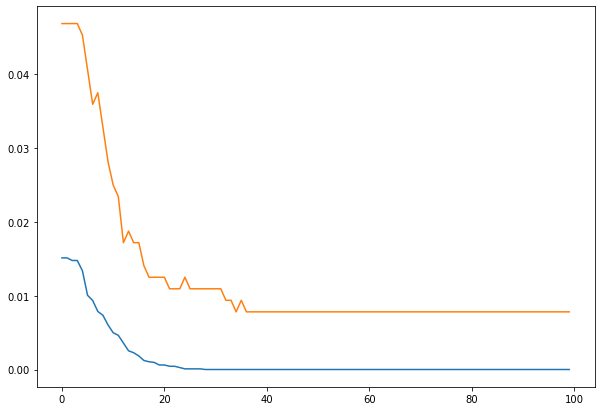

In [67]:
plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["error"], label="Training loss")
plt.plot(results["validation_1"]["error"], label="Validation loss")

# Hyperparameter testing for XGBoost with SMOTE technique

In [32]:
user = []
accuracy = []
balance_accuracy = []
precission = []
Recall = []
FAR = []
FRR = []

for i in range (116,117):
    user_train_set = all_merged[all_merged['User']==i].sample(frac=0.8, random_state=42)
    sample_ids = all_merged[all_merged['User']==i].sample(frac=0.8, random_state=42)['sample']
    user_test_set = all_merged[(all_merged['User']==i) & ~all_merged['sample'].isin (sample_ids)]
    user_id = i
    
    all_train_set  = pd.DataFrame()
    all_test_set = pd.DataFrame()
    
    for b,j in enumerate (all_merged['User'].unique()):
        if j != i:
        
            train_set = all_merged[all_merged['User']==j].sample(frac=0.8, random_state=42)
            sample_ids = all_merged[all_merged['User']==j].sample(frac=0.8, random_state=42)['sample']
            test_set = all_merged[(all_merged['User']==j) & ~all_merged['sample'].isin (sample_ids) ]
    
            all_train_set = all_train_set.append(train_set,ignore_index=True)
            all_test_set = all_test_set.append(test_set, ignore_index=True)
            
    user_train_set['User_type']=1
    user_test_set['User_type']=1
    all_train_set['User_type']=0
    all_test_set['User_type']=0
    
    
    final_train_set = user_train_set.append(all_train_set)
    final_test_set = user_test_set.append(all_test_set)
    
    x_train = final_train_set[selected_features]
    x_test = final_test_set[selected_features]
    y_train = final_train_set['User_type']
    y_test = final_test_set['User_type']
    
    
    param_grid = {  
                    'min_child_weight': [0],
                'max_depth': range(4,6,1),
                'n_estimators': range (400,550,50),
             'eta': [0.1],
             'subsample':[0.5,0.6,0.7],
             'scale_pos_weight':range(100,115,5)
                 }
    
    ad = SMOTE(random_state=42)
    
    x_train_res, y_train_res = ad.fit_resample(x_train, y_train)
    
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=10)
    grid_xgb = GridSearchCV(xgb.XGBClassifier(), param_grid, refit = True, verbose = True, cv = skf, n_jobs = 1)
    grid_xgb.fit(x_train_res, y_train_res)
    

#         acc = metrics.accuracy_score(pred_values , y_val)
#         prec = metrics.precision_score(pred_values, y_val)
#         recall = metrics.recall_score(pred_values, y_val)
#         cnf_matrix = confusion_matrix(pred_values, y_val)
#         TP = cnf_matrix[0][0] 
#         FP = cnf_matrix[0][1]
#         FN = cnf_matrix[1][0]
#         TN = cnf_matrix[1][1]

#         FAR_u = (FP/(FP+TN))
#         FRR_u = (FN/(TP+FN))
#         acc_score.append(acc)
#         prec_score.append(prec)
#         recall_score.append(recall)
#         FAR_score.append(FAR_u)
#         FRR_score.append(FRR_u)
        
    
    
#     user.append(user_id)
#     accuracy.append(avg_acc_score)
#     precission.append(avg_prec_score)
#     Recall.append(avg_recall_score)
#     FAR.append(avg_FAR_score)
#     FRR.append(avg_FRR_score)
    
# Final_results_df = pd.DataFrame(list(zip(user,accuracy, precission, Recall, FAR, FRR)),
#         columns =['User','Accuracy','Precission', 'Recall', 'FAR%','FRR%'])
   

C:\Users\s3929438\AppData\Local\Temp/ipykernel_17460/2278219907.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_test_set['User_type']=1


Fitting 10 folds for each of 54 candidates, totalling 540 fits


In [33]:
 grid_xgb.best_params_

{'eta': 0.1,
 'max_depth': 4,
 'min_child_weight': 0,
 'n_estimators': 400,
 'scale_pos_weight': 100,
 'subsample': 0.7}